# Classification

Most eukaryotic genes undergo intron splicing events. These happen at the level of mRNA, after transcription and before translation. Pre-mRNA consists of exons, which are the proteincoding regions, and introns, which are the intervening sections in between. As a base rule, the spliceosome cuts out introns, retaining the consecutive exons to form mature mRNA. This mature mRNA is then translated to protein.

In this practical you will build a classification model for gene splice site prediction from DNA sequences. The vast majority of splice sites are characterized by the presence of specific dimers on the intronic side of the splice site: "GT" for donor and "AG" for acceptor sites. Yet, only about 0.1-1% of all "GT" and "AG" occurrences in the genome represent true splice sites. 

We will focus on acceptor site prediction. You are given the following data set:

In [0]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554/master/practicum/3._Classification/acceptor_sites_dataset_train.csv")

In [2]:
data.head(5)

,label,sequence
0,1,TTTGAATTGTAGGTGTCCTGCT
1,1,TATTTTTTAAAGAACTGGAAGA
2,1,TTTCTTTTTCAGATGAAGAATG
3,1,TATTAATTTCAGTTTGGTTGTT
4,1,TAAAAATTTAAGTTCGTCCCGA


There are only two columns. The column "sequence" contains a local DNA context sequence that surrounds a candidate acceptor site (nucleotides at positions 11 and 12 in the sequence are always "A" and "G" respectively), so these positions are candidate gene acceptor sites. The column "label" indicates the class: 1 for "is acceptor site" and -1 for "is not acceptor site". The goal is to predict the target from the local context sequence of the candidate acceptor site. 

*How many sequences does the dataset contain for each class?*

In [42]:
data['label'].value_counts()

-1    1503
 1     145
Name: label, dtype: int64

Next, useful features need to be computed from the DNA sequences, a process known as **feature engineering**. 

The Pandas `.apply()` method that allows us the process the values in a DataFrame column to create a new column. We will apply this function to compute feature vectors from the `sequence` column in the `data` DataFrame.  

The "AG" in the middle of each context sequence is the same for both classes, i.e. it does not provide any discriminative information. So, We shouldn't compute features from the middle AG dinculeotide in the local context sequence.

*Use the Pandas DataFrame `.apply()` method to remove the middle "AG" dinucleotides in the DNA sequences (don't create a new column):*

In [4]:
def remove_AG(x):
    return x[0:10]+x[12:22]

print(data.head())

data["sequence"] = data["sequence"].apply(remove_AG)

print(data.head())

   label                sequence
0      1  TTTGAATTGTAGGTGTCCTGCT
1      1  TATTTTTTAAAGAACTGGAAGA
2      1  TTTCTTTTTCAGATGAAGAATG
3      1  TATTAATTTCAGTTTGGTTGTT
4      1  TAAAAATTTAAGTTCGTCCCGA
   label              sequence
0      1  TTTGAATTGTGTGTCCTGCT
1      1  TATTTTTTAAAACTGGAAGA
2      1  TTTCTTTTTCATGAAGAATG
3      1  TATTAATTTCTTTGGTTGTT
4      1  TAAAAATTTATTCGTCCCGA


A trivial feature vector representation would be to replace each amino acid with a number, making the Machine Learning aware about each amino acid at each position in the DNA context sequence. The following method maps a DNA sequence `x`to a Python list with a number for each amino acid:

In [0]:
def DNA_int_encoding(x):
    encoding = []
    for nuc in x:
        if nuc == 'A':
            encoding.append(0)
        elif nuc == 'C':
            encoding.append(1)
        elif nuc == 'G':
            encoding.append(2)
        elif nuc == 'T':
            encoding.append(3)
        else:
            print("Found non-nucleotide in %s"%x)
    return encoding

*Apply this function on the `sequence` column in the `data` DataFrame to create a Series with feature vectors (write the resulting feature vectors to a variable called `data_features_int_encoding`:*

In [6]:
data_features_int_encoding = data["sequence"].apply(DNA_int_encoding)

data_features_int_encoding.head()

0    [3, 3, 3, 2, 0, 0, 3, 3, 2, 3, 2, 3, 2, 3, 1, ...
1    [3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 3, 2, ...
2    [3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 0, 3, 2, 0, 0, ...
3    [3, 0, 3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 3, 2, 2, ...
4    [3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 1, 2, 3, ...
Name: sequence, dtype: object

Next we put these feature vectors back in a Pandas DataFrame as follows:

In [7]:
data_features_int_encoding = pd.DataFrame(data_features_int_encoding.tolist())

data_features_int_encoding.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3,3,3,2,0,0,3,3,2,3,2,3,2,3,1,1,3,2,1,3
1,3,0,3,3,3,3,3,3,0,0,0,0,1,3,2,2,0,0,2,0
2,3,3,3,1,3,3,3,3,3,1,0,3,2,0,0,2,0,0,3,2
3,3,0,3,3,0,0,3,3,3,1,3,3,3,2,2,3,3,2,3,3
4,3,0,0,0,0,0,3,3,3,0,3,3,1,2,3,1,1,1,2,0


Evaluate the generalization performance of a logisitc regression model with hyperparameters $C=0.1$ on the data set `data_features_int_encoding` using 10-fold cross-validation. Use the `cross_val_score()` function to compute the mean accuracy of the CV-scores. 

In [9]:
# solution!!
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model = LogisticRegression(C=0.1)
print(np.mean(cross_val_score(model,data_features_int_encoding,data.label,cv=10)))

0.9253658536585366


What does this number mean?

Load the acceptor site test data set *acceptor_sites_dataset_test.csv* in a Pandas DataFrame called `data_test`.

In [0]:
data_test = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554/master/practicum/3._Classification/acceptor_sites_dataset_test.csv")

First we need to compute the same feature vectors for the test set:

In [0]:
# solution !!!

data_test["sequence"] = data_test["sequence"].apply(remove_AG)

data_test_features_int_encoding = data_test["sequence"].apply(DNA_int_encoding)
data_test_features_int_encoding = pd.DataFrame(data_test_features_int_encoding.tolist())

Now fit a logistic regression model on the train set.

In [12]:
model.fit(data_features_int_encoding,data.label)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

To predict the class labels for the third part (the test set) using this model we can use the following code.

In [0]:
predictions = model.predict(data_test_features_int_encoding)

Scikit-learn offers many metrics to evaluate model predictions. These functions are contained in the `metrics` module of `sklearn`. Can you find how to compute the accuracy of these predictions?

In [14]:
#solution!!
from sklearn import metrics

print(metrics.accuracy_score(data_test.label,predictions))

0.9221014492753623


An accuracy above 90% seems like a good score. But is it? Let's consider a model that predicts class "-1" for all test points.

In [0]:
predictions_zero = [-1]*len(data_test.label)

What is the accuracy of these predictions?

In [16]:
# solution !!
print(metrics.accuracy_score(data_test.label,predictions_zero))

0.9003623188405797


So this should be a good score as well, even though we did not learn anything.

For classification tasks where the classes are highly imbalanced accuracy is not a good metric to evaluate the generalization performance. In fact, if there are 0.1% AG dinucleotides in a genome that are true acceptor sites then a model that predicts class "-1" for each AG would have an accuracy of 99.9%.

We have seen how a ROC curve plots the true positives rate against the false positives rate. Both these metrics focus on the positive class, in our case the true acceptor sites. These metrics are much more suitable to evalute the performance of models on tasks with highly imbalanced classes. To transform a ROC curve into one metric we can use the area under the curve (AUC). 

What is the AUC score of the predictions computed by the linear regression model we fitted?

In [17]:
# solution !!
print(metrics.auc(data_test.label,predictions))

-2.0


You should see a negative value. This is because to compute the AUC we need the predictions to be scores (a continuous value) rather than class labels (discrete values). 

For logistic regression these scores are the class probabilities predicted by the model. We can obtain them using the `predict_proba()` function of the `LogisticRegression` module as follows:

In [0]:
predictions = model.predict_proba(data_test_features_int_encoding)

What does variable `predictions` contain?

In [19]:
# solution !!
predictions

array([[0.33015439, 0.66984561],
       [0.44977258, 0.55022742],
       [0.34876393, 0.65123607],
       ...,
       [0.99674001, 0.00325999],
       [0.9820754 , 0.0179246 ],
       [0.982688  , 0.017312  ]])

The first and second column contains the predicted probabilities for class '-1' and '1' respectively. To compute the AUC we need to use the positive class probabilities. What is the AUC now?

In [20]:
# solution !!
print(metrics.auc(data_test.label,predictions[:,1]))

0.365258280739163


Is this good generalization performance?

Transforming categorical features into ordered integers is maybe not a good idea as the nucleotides don't have any ordering. It is better to transform a categorical feature into one binary feature for each category (known as *one-hot* encoding. 

We can do this with the following function that again computes feature vectors:

In [0]:
def DNA_onehot_encoding(x):
    encoding = []
    for nuc in x:
        if nuc == 'A':
            encoding.extend([1,0,0,0])
        elif nuc == 'C':
            encoding.extend([0,1,0,0])
        elif nuc == 'G':
            encoding.extend([0,0,1,0])
        elif nuc == 'T':
            encoding.extend([0,0,0,1])
        else:
            encoding.extend([0,0,0,0])
    return encoding

Create a Pandas DataFrame called `data_features_onehot_encoding` that contains the *one-hot* encoded features.

In [0]:
data_features_onehot_encoding = pd.DataFrame(data["sequence"].apply(DNA_onehot_encoding).tolist())

Show the first five rows.

In [23]:
data_features_onehot_encoding.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [0]:
#ask about features for AG...
#now build a final model that you can use in production
#investigate feature importances
#given this analsis, is the test set still unseen data?

Evaluate the generalization performance of a logisitc regression model with hyperparameters $C=0.1$ on the data set `data_features_onehot_encoding` using 10-fold cross-validation. Use the `cross_val_score()` function to compute the mean AUC of the CV-scores. The `cross_val_score()` has a function parameter called `scoring` that you will not to use to replace the *accuracy* metric with the *AUC* metric.

In [24]:
model = LogisticRegression(C=0.1)
print(np.mean(cross_val_score(model,data_features_onehot_encoding,data.label,cv=10,scoring="roc_auc")))

0.9867797540208135


What is the AUC on `data_test`?

In [25]:
data_test_features_onehot_encoding = pd.DataFrame(data_test["sequence"].apply(DNA_onehot_encoding).tolist())

model.fit(data_features_onehot_encoding,data.label)

predictions = model.predict_proba(data_test_features_onehot_encoding)
print("AUC=%.2f" % metrics.auc(data_test.label,predictions[:,1]))

AUC=0.77


Is this close to what your CV is telling you?

We have used hyperparameter $C=0.1$ for the logistic regression model. Is there a better value for this regularization parameter (use `GridSearchCV`)? 

In [27]:
#Solution !!
from sklearn.model_selection import GridSearchCV

search_space = [0.001,0.01,0.1,1,10,100]

params = dict(C=search_space)
grid_search = GridSearchCV(model, param_grid=params)

grid_search.fit(data_features_onehot_encoding,data.label)

print(grid_search.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


What is the 10-CV AUC performance with this value for $C$?

In [28]:
model = LogisticRegression(C=1)
print(np.mean(cross_val_score(model,data_features_onehot_encoding,data.label,cv=10,scoring="roc_auc")))

0.9847463891516872


What is the AUC performance on the test set for this value of $C$?

In [29]:
model.fit(data_features_onehot_encoding,data.label)

predictions = model.predict_proba(data_test_features_onehot_encoding)
print("AUC=%.2f" % metrics.auc(data_test.label,predictions[:,1]))

AUC=0.95


Is this closer to the AUC you computed using 10-CV?

In [30]:
columns = []

for i in range(-10,0,1):
    for nuc in ['A','C','G','T']:
        columns.append("%i_%s"%(i,nuc))
for i in range(1,11,1):
    for nuc in ['A','C','G','T']:
        columns.append("%i_%s"%(i,nuc))
        
print(columns)

['-10_A', '-10_C', '-10_G', '-10_T', '-9_A', '-9_C', '-9_G', '-9_T', '-8_A', '-8_C', '-8_G', '-8_T', '-7_A', '-7_C', '-7_G', '-7_T', '-6_A', '-6_C', '-6_G', '-6_T', '-5_A', '-5_C', '-5_G', '-5_T', '-4_A', '-4_C', '-4_G', '-4_T', '-3_A', '-3_C', '-3_G', '-3_T', '-2_A', '-2_C', '-2_G', '-2_T', '-1_A', '-1_C', '-1_G', '-1_T', '1_A', '1_C', '1_G', '1_T', '2_A', '2_C', '2_G', '2_T', '3_A', '3_C', '3_G', '3_T', '4_A', '4_C', '4_G', '4_T', '5_A', '5_C', '5_G', '5_T', '6_A', '6_C', '6_G', '6_T', '7_A', '7_C', '7_G', '7_T', '8_A', '8_C', '8_G', '8_T', '9_A', '9_C', '9_G', '9_T', '10_A', '10_C', '10_G', '10_T']


In [31]:
data_features_onehot_encoding.columns = columns
data_features_onehot_encoding.head()

,-10_A,-10_C,-10_G,-10_T,-9_A,-9_C,-9_G,-9_T,-8_A,-8_C,-8_G,-8_T,-7_A,-7_C,-7_G,-7_T,-6_A,-6_C,-6_G,-6_T,-5_A,-5_C,-5_G,-5_T,-4_A,-4_C,-4_G,-4_T,-3_A,-3_C,-3_G,-3_T,-2_A,-2_C,-2_G,-2_T,-1_A,-1_C,-1_G,-1_T,1_A,1_C,1_G,1_T,2_A,2_C,2_G,2_T,3_A,3_C,3_G,3_T,4_A,4_C,4_G,4_T,5_A,5_C,5_G,5_T,6_A,6_C,6_G,6_T,7_A,7_C,7_G,7_T,8_A,8_C,8_G,8_T,9_A,9_C,9_G,9_T,10_A,10_C,10_G,10_T
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
2,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [32]:
model.fit(data_features_onehot_encoding,data.label)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
F_importances = []
for feature_name,lr_coefficient in zip(data_features_onehot_encoding.columns,model.coef_[0]):
    F_importances.append([feature_name,lr_coefficient])

In [34]:
F_importances = pd.DataFrame(F_importances,columns=["feature_name","importance"])
F_importances.head()

,feature_name,importance
0,-10_A,0.479138
1,-10_C,-0.217342
2,-10_G,-0.848154
3,-10_T,0.586224
4,-9_A,0.322553


In [35]:
def get_nuc(x):
    return(x.split("_")[1])

def get_position(x):
    if x.split("_")[0] == "A": return 0
    if x.split("_")[0] == "G": return 0
    return(int(x.split("_")[0]))

F_importances["nuc"] = F_importances["feature_name"].apply(get_nuc)
F_importances["position"] = F_importances["feature_name"].apply(get_position)

F_importances.head()

,feature_name,importance,nuc,position
0,-10_A,0.479138,A,-10
1,-10_C,-0.217342,C,-10
2,-10_G,-0.848154,G,-10
3,-10_T,0.586224,T,-10
4,-9_A,0.322553,A,-9


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


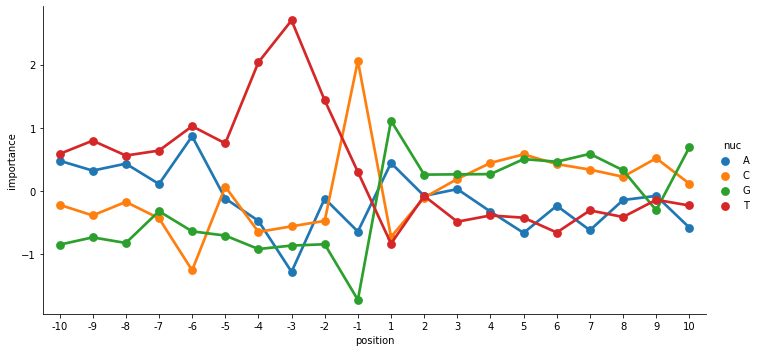

In [36]:
import seaborn as sns
#sns.barplot(x="position",y="importance",data=F_importances[F_importances["nuc"]=="A"])

sns.factorplot(x="position", y="importance", hue="nuc", data=F_importances, aspect=2)

In [0]:
def make_shorter(x):
    return x[4:-4]

data["sequence_10"] = data["sequence"].apply(make_shorter)
data_test["sequence_10"] = data_test["sequence"].apply(make_shorter)

In [0]:
data_features_onehot_encoding = pd.DataFrame(data["sequence_10"].apply(DNA_onehot_encoding).tolist())
data_test_features_onehot_encoding = pd.DataFrame(data_test["sequence_10"].apply(DNA_onehot_encoding).tolist())

In [40]:
from sklearn.model_selection import GridSearchCV

search_space = [0.001,0.01,0.1,1,10,100]

params = dict(C=search_space)
grid_search = GridSearchCV(model, param_grid=params)

grid_search.fit(data_features_onehot_encoding,data.label)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9648061158699457


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
model = LogisticRegression(C=1)
model.fit(data_features_onehot_encoding,data.label)

predictions = model.predict_proba(data_test_features_onehot_encoding)
print("AUC=%.2f" % metrics.auc(data_test.label,predictions[:,1]))

AUC=0.82
